In [1]:
from QCircuit import *
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from scipy import constants
%matplotlib inline
from numpy import *

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.ticker

import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
import numpy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle

import numpy as np

# 3 consecutive loops


In [26]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['GND', '1'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['1', '2'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['GND', '3'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['GND', '4'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['GND', '6'])


FQJJ.add_element(QCapacitance('CA'), ['GND', '1'])
FQJJ.add_element(QCapacitance('CB'), ['1', '2'])
FQJJ.add_element(QCapacitance('CC'), ['GND', '3'])
FQJJ.add_element(QCapacitance('CD'), ['GND', '4'])
FQJJ.add_element(QCapacitance('CE'), ['4', '5'])
FQJJ.add_element(QCapacitance('CF'), ['GND', '6'])

        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
#phia = QVariable('φa')
phie = QVariable('φe')

#phix2 = QVariable('φx2')
phix.create_grid(24, 1)
phiy.create_grid(24, 1)
phiz.create_grid(24, 1)
#phia.create_grid(16, 1)

FQJJ.add_variable(phix)
FQJJ.add_variable(phiy)
FQJJ.add_variable(phiz)
FQJJ.add_variable(phie)
#FQJJ.add_variable(phia)

#FQJJ.add_variable(phix2)
#FQJJ.map_nodes_linear(['GND', '1', '2', '3'], 
#                       ['φ', 'φx1', 'φx2'], 
#                       np.asarray([[0,0,0],[1,0,0],[1,1,0],[1,1,1]]))

FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6'], 
                       ['φx', 'φy', 'φz', 'φe'], 
                       np.asarray([[0,0,0,0], [0,0,1,0], [1,0,0,-1], [1,0,0,0], [0,1,0,0], [1,0,0,2], [1,0,0,1]]))

#EjEc_ratio = 80
alpha = 0.6
flux_steps = 128
#energies = np.zeros((flux_steps,flux_steps,2), dtype=np.float)
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 120e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJB').set_critical_current(Ej)
FQJJ.find_element('JJD').set_critical_current(Ej)
FQJJ.find_element('JJE').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CB').set_capacitance(2/Ec)
FQJJ.find_element('CD').set_capacitance(2/Ec)
FQJJ.find_element('CE').set_capacitance(2/Ec)

FQJJ.find_element('JJC').set_critical_current(Ej*alpha)
FQJJ.find_element('CC').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJF').set_critical_current(Ej*alpha)
FQJJ.find_element('CF').set_capacitance(2*alpha/Ec)



phi_range = np.linspace(-0*np.pi, 4*np.pi, flux_steps)
#phi_range = np.linspace(-13*np.pi/2, 13*np.pi/2, flux_steps)
for phie_id, phie_value in enumerate(phi_range):
    #for phix2_id, phix2_value in enumerate(np.linspace(-2*np.pi, 2*np.pi, flux_steps)):
    phie.set_parameter(phie_value, 0)
        #phix2.set_parameter(phix2_value, 0)
    FQJJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
    #energies[phix1_id, phix2_id, :] = eigenenergies
    energies[phie_id, :] = eigenenergies
    print phie_id
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:80: ComplexWarning: Casting complex values to real discards the imaginary part


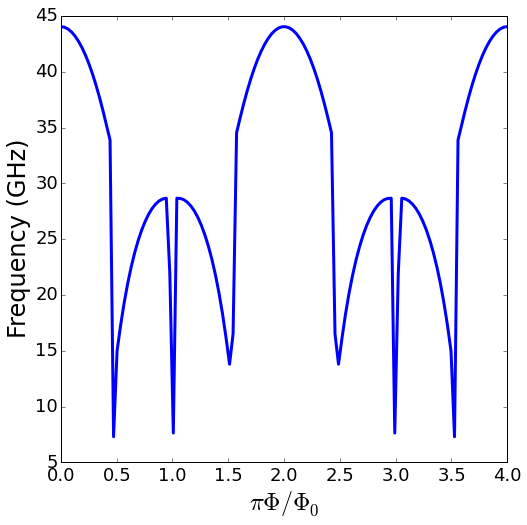

In [29]:
fig, axes = plt.subplots(figsize=(8, 8))

# original
#Z = np.real(U)
plt.plot(np.linspace(0, 4, flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)
axes.set_xlabel(r'$\pi\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#axes.set_ylim((0, 1))

#plt.plot(np.linspace(-6*np.pi, 6*np.pi, flux_steps), energies[:,1]-energies[:,0])
#plt.plot(np.linspace(-0.9*np.pi, -0.1*np.pi, flux_steps), (energies[:,2]-energies[:,0])/2)

#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), -(energies[:,1]-energies[:,0])+(energies[:,2]-energies[:,1]), 'r')
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,2]-energies[:,1])
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,3]-energies[:,2])

#plt.gcf().set_size_inches(10,8)
plt.savefig("C:/neon/diagonalization_plot_6.pdf", bbox_inches="tight")

# 4 loops square

In [13]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['1', '3'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['GND', '4'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['2', '5'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['3', '4'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['3', '6'])
FQJJ.add_element(QJosephsonJunction('JJG'), ['4', '7'])
FQJJ.add_element(QJosephsonJunction('JJH'), ['5', '8'])

FQJJ.add_element(QCapacitance('CA'), ['1', '3'])
FQJJ.add_element(QCapacitance('CB'), ['GND', '4'])
FQJJ.add_element(QCapacitance('CC'), ['2', '5'])
FQJJ.add_element(QCapacitance('CD'), ['3', '4'])
FQJJ.add_element(QCapacitance('CE'), ['4', '5'])
FQJJ.add_element(QCapacitance('CF'), ['3', '6'])
FQJJ.add_element(QCapacitance('CG'), ['4', '7'])
FQJJ.add_element(QCapacitance('CH'), ['5', '8'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phib = QVariable('φb')
phie = QVariable('φe')


phix.create_grid(12, 1)
phiy.create_grid(12, 1)
phiz.create_grid(12, 1)
phib.create_grid(12, 1)

FQJJ.add_variable(phix)
FQJJ.add_variable(phiy)
FQJJ.add_variable(phiz)
FQJJ.add_variable(phib)
FQJJ.add_variable(phie)

FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6', '7', '8'], 
                      ['φx', 'φy', 'φz', 'φb', 'φe'], 
                      np.asarray([[0,0,0,0,0], [0,0,0,0,-1], [0,0,0,0,1], [0,0,1,0,-1], [1,0,0,0,0], [0,1,0,0,1], [1,0,0,1,1], [1,0,0,1,0],[1,0,0,1,-1]]))

alpha = 0.72
flux_steps = 100
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 200e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJF').set_critical_current(Ej)
FQJJ.find_element('JJC').set_critical_current(Ej)
FQJJ.find_element('JJH').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CF').set_capacitance(2/Ec)
FQJJ.find_element('CC').set_capacitance(2/Ec)
FQJJ.find_element('CH').set_capacitance(2/Ec)

FQJJ.find_element('JJB').set_critical_current(Ej*alpha)
FQJJ.find_element('CB').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJD').set_critical_current(Ej*alpha)
FQJJ.find_element('CD').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJE').set_critical_current(Ej*alpha)
FQJJ.find_element('CE').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJG').set_critical_current(Ej*alpha)
FQJJ.find_element('CG').set_capacitance(2*alpha/Ec)



phi_range = np.linspace(-2*np.pi, 0*np.pi, flux_steps)
for phie_id, phie_value in enumerate(phi_range):
    phie.set_parameter(phie_value, 0)
    FQJJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
    energies[phie_id, :] = eigenenergies
    print (phie_id)
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:77: ComplexWarning: Casting complex values to real discards the imaginary part


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


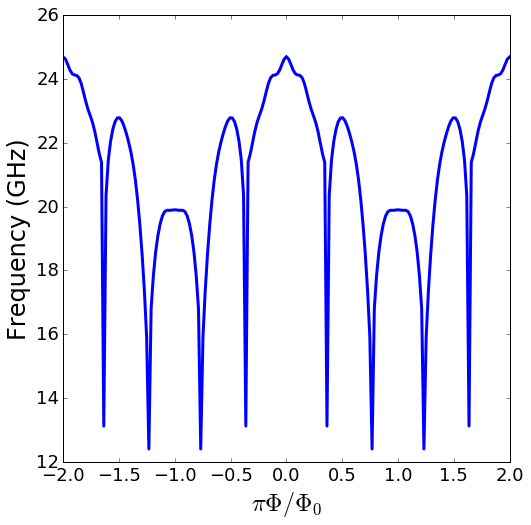

In [14]:
fig, axes = plt.subplots(figsize=(8, 8))

# original
#Z = np.real(U)
plt.plot(np.linspace(-2, 0, flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)
plt.plot(np.linspace( 0, 2, flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)
#plt.plot(np.linspace(-2, 2, flux_steps), (energies[:,2]-energies[:,1])/1e9, 'r', linewidth=3.0)
#plt.plot(np.linspace(-2, 2, flux_steps), (energies[:,3]-energies[:,2])/1e9, 'g', linewidth=3.0)
axes.set_xlabel(r'$\pi\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#axes.set_ylim((8, 9))

#plt.plot(np.linspace(-6*np.pi, 6*np.pi, flux_steps), energies[:,1]-energies[:,0])
#plt.plot(np.linspace(-0.9*np.pi, -0.1*np.pi, flux_steps), (energies[:,2]-energies[:,0])/2)

#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), -(energies[:,1]-energies[:,0])+(energies[:,2]-energies[:,1]), 'r')
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,2]-energies[:,1])
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,3]-energies[:,2])

#plt.gcf().set_size_inches(10,8)
#plt.savefig("C:/neon/4 mirror qubit alpha=1.2.pdf", bbox_inches="tight")

# Stability diagram

In [15]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['1', '3'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['GND', '4'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['2', '5'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['3', '4'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['4', '5'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['3', '6'])
FQJJ.add_element(QJosephsonJunction('JJG'), ['4', '7'])
FQJJ.add_element(QJosephsonJunction('JJH'), ['5', '8'])

FQJJ.add_element(QCapacitance('CA'), ['1', '3'])
FQJJ.add_element(QCapacitance('CB'), ['GND', '4'])
FQJJ.add_element(QCapacitance('CC'), ['2', '5'])
FQJJ.add_element(QCapacitance('CD'), ['3', '4'])
FQJJ.add_element(QCapacitance('CE'), ['4', '5'])
FQJJ.add_element(QCapacitance('CF'), ['3', '6'])
FQJJ.add_element(QCapacitance('CG'), ['4', '7'])
FQJJ.add_element(QCapacitance('CH'), ['5', '8'])
        
phix = QVariable('φx')
phiy = QVariable('φy')
phiz = QVariable('φz')
phib = QVariable('φb')
phie1 = QVariable('φe1')
phie2 = QVariable('φe2')


phix.create_grid(7, 1)
phiy.create_grid(7, 1)
phiz.create_grid(7, 1)
phib.create_grid(7, 1)

FQJJ.add_variable(phix)
FQJJ.add_variable(phiy)
FQJJ.add_variable(phiz)
FQJJ.add_variable(phib)
FQJJ.add_variable(phie1)
FQJJ.add_variable(phie2)

FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6', '7', '8'], 
                      ['φx', 'φy', 'φz', 'φb', 'φe1', 'φe2'], 
                      np.asarray([[0,0,0,0,0,0], [0,0,0,0,-1,0], [0,0,0,0,1,0], [0,0,1,0,-1,0], [1,0,0,0,0,0],
                                  [0,1,0,0,1,0], [1,0,0,1,0,1], [1,0,0,1,0,0],[1,0,0,1,0,-1]]))

alpha = 0.72
flux_steps = 100
energies = np.zeros((flux_steps,flux_steps,4), dtype=np.float)

Ej = 200e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJF').set_critical_current(Ej)
FQJJ.find_element('JJC').set_critical_current(Ej)
FQJJ.find_element('JJH').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CF').set_capacitance(2/Ec)
FQJJ.find_element('CC').set_capacitance(2/Ec)
FQJJ.find_element('CH').set_capacitance(2/Ec)

FQJJ.find_element('JJB').set_critical_current(Ej*alpha)
FQJJ.find_element('CB').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJD').set_critical_current(Ej*alpha)
FQJJ.find_element('CD').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJE').set_critical_current(Ej*alpha)
FQJJ.find_element('CE').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJG').set_critical_current(Ej*alpha)
FQJJ.find_element('CG').set_capacitance(2*alpha/Ec)

phi_range1 = np.linspace(-2*np.pi, 2*np.pi, flux_steps)
phi_range2 = np.linspace(-2*np.pi, 2*np.pi, flux_steps)

for phie1_id, phie1_value in enumerate(phi_range1):
    for phie2_id, phie2_value in enumerate(phi_range2):
        phie1.set_parameter(phie1_value, 0)
        phie2.set_parameter(phie2_value, 0)
        FQJJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
        energies[phie1_id, phie2_id, :] = eigenenergies
        print (phie1_id,phie2_id)


C:\Anaconda3\envs\py34\lib\site-packages\ipykernel\__main__.py:82: ComplexWarning: Casting complex values to real discards the imaginary part


0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
2 0
2 1
2 2
2 3
2 4


In [19]:
# Создаем двумерную матрицу-сетку
xgrid, ygrid = np.meshgrid(phi_range1/np.pi/2,phi_range2/np.pi/2)

# В узлах рассчитываем значение функции
zgrid0 = xgrid+ygrid

for i in arange (0, flux_steps-1, 1):
    for j in arange (0, flux_steps-1, 1):
        zgrid0[j][i]=energies[i,j,0]
        
x1=arange (-0.8, 0.8, 0.01)
x2=arange (-0.4, 0.4, 0.01)

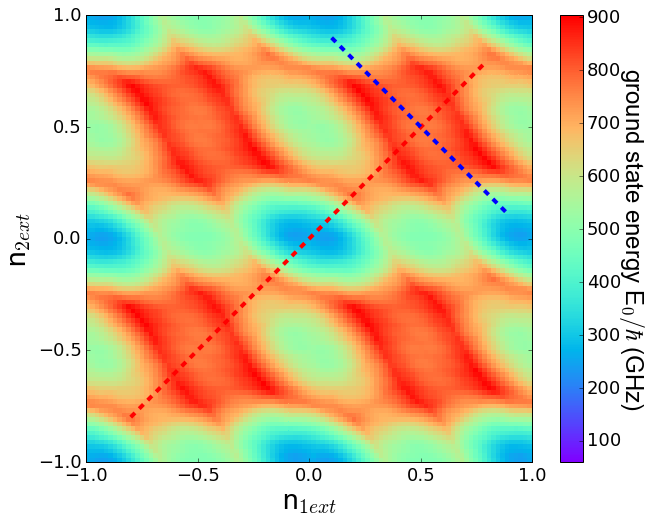

In [21]:
hfont = {'fontname':'Arial'}
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

p = axes.pcolor(ygrid, xgrid, zgrid0/1e9, cmap=cm.rainbow,  vmin=60, vmax=zgrid0.max()/1e9)

axes.set_xlabel(r'n$_{1ext}$', fontsize=28, **hfont)
axes.set_ylabel(r'n$_{2ext}$', fontsize=28, **hfont)
axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)
axes.set_xticks(arange(-1, 1.1, 0.5));
axes.axis('tight')

#axes.text(-0.15, -0,r'(0,0)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.15, -0.85,r'(0,-1)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.15, 0.85,r'(0,1)', color ='w', fontsize=24, verticalalignment='center')

#axes.text(0.70, -0,r'(1,0)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(0.70, -0.85,r'(1,-1)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(0.70, 0.85,r'(1,1)', color ='w', fontsize=24, verticalalignment='center')

#axes.text(-0.95, -0,r'(-1,0)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.95, -0.85,r'(-1,-1)', color ='w', fontsize=24, verticalalignment='center')
#axes.text(-0.95, 0.85,r'(-1,1)', color ='w', fontsize=24, verticalalignment='center')

axes.plot(x1,x1, '--r' , linewidth=4.0)
axes.plot(x2+0.5,-x2+0.5, '--b' , linewidth=4.0)

#plt.plot([0, 0.33, 0.5], [0, 0.33, 0.5], 'bs', linewidth=10.0)

cb = fig.colorbar(p, ax=axes)
cb.set_label('ground state energy E$_{0}/\hbar$ (GHz)', labelpad=25, rotation=270, fontsize=24, **hfont)
cb.ax.tick_params(labelsize=18) 

plt.gcf().set_size_inches(10,8)
plt.savefig("C:/neon/4loops qubit.pdf", bbox_inches="tight")

# 6 box mirror qubit

In [73]:
FQJJ = QCircuit()
FQJJ.add_element(QJosephsonJunction('JJA'), ['1', '3'])
FQJJ.add_element(QJosephsonJunction('JJB'), ['3', '5'])
FQJJ.add_element(QJosephsonJunction('JJC'), ['2', '4'])
FQJJ.add_element(QJosephsonJunction('JJD'), ['4', '7'])
FQJJ.add_element(QJosephsonJunction('JJE'), ['GND', '3'])
FQJJ.add_element(QJosephsonJunction('JJF'), ['3', '4'])
FQJJ.add_element(QJosephsonJunction('JJG'), ['3', '6'])
FQJJ.add_element(QJosephsonJunction('JJH'), ['5', '6'])
FQJJ.add_element(QJosephsonJunction('JJI'), ['5', '7'])
FQJJ.add_element(QJosephsonJunction('JJJ'), ['6', '8'])
FQJJ.add_element(QJosephsonJunction('JJK'), ['6', '9'])

FQJJ.add_element(QCapacitance('CA'), ['1', '3'])
FQJJ.add_element(QCapacitance('CB'), ['3', '5'])
FQJJ.add_element(QCapacitance('CC'), ['2', '4'])
FQJJ.add_element(QCapacitance('CD'), ['4', '7'])
FQJJ.add_element(QCapacitance('CE'), ['GND', '3'])
FQJJ.add_element(QCapacitance('CF'), ['3', '4'])
FQJJ.add_element(QCapacitance('CG'), ['3', '6'])
FQJJ.add_element(QCapacitance('CH'), ['5', '6'])
FQJJ.add_element(QCapacitance('CI'), ['5', '7'])
FQJJ.add_element(QCapacitance('CJ'), ['6', '8'])
FQJJ.add_element(QCapacitance('CK'), ['6', '9'])
        
phia = QVariable('φa')
phib = QVariable('φb')
phic = QVariable('φc')
phid = QVariable('φd')
phii = QVariable('φi')
phie = QVariable('φe')


phia.create_grid(10, 1)
phib.create_grid(10, 1)
phic.create_grid(10, 1)
phid.create_grid(10, 1)
phii.create_grid(10, 1)

FQJJ.add_variable(phia)
FQJJ.add_variable(phib)
FQJJ.add_variable(phic)
FQJJ.add_variable(phid)
FQJJ.add_variable(phii)
FQJJ.add_variable(phie)

FQJJ.map_nodes_linear(['GND', '1', '2', '3', '4', '5', '6', '7', '8', '9'], 
                      ['φa', 'φb', 'φc', 'φd','φi', 'φe'], 
                      np.asarray([[0,0,0,0,0,0], [0,0,0,0,0,-1], [0,0,0,0,0,1], [1,0,0,0,0,-1], [0,0,1,0,0,1],
                                  [1,1,0,0,0,-2], [0,0,1,1,0,2], [1,1,0,0,1,-2], [1,1,0,0,1,-3], [1,1,0,0,1,-4]]))

alpha = 0.75
flux_steps = 32
energies = np.zeros((flux_steps,4), dtype=np.float)

Ej = 120e9
Ec = 2*1.9e-19**2/5e-15/(2*np.pi*1.054e-34)
FQJJ.find_element('JJA').set_critical_current(Ej)
FQJJ.find_element('JJB').set_critical_current(Ej)
FQJJ.find_element('JJC').set_critical_current(Ej)
FQJJ.find_element('JJD').set_critical_current(Ej)
FQJJ.find_element('JJI').set_critical_current(Ej)
FQJJ.find_element('JJK').set_critical_current(Ej)

FQJJ.find_element('CA').set_capacitance(2/Ec)
FQJJ.find_element('CB').set_capacitance(2/Ec)
FQJJ.find_element('CC').set_capacitance(2/Ec)
FQJJ.find_element('CD').set_capacitance(2/Ec)
FQJJ.find_element('CI').set_capacitance(2/Ec)
FQJJ.find_element('CK').set_capacitance(2/Ec)

FQJJ.find_element('JJE').set_critical_current(Ej*alpha)
FQJJ.find_element('CE').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJF').set_critical_current(Ej*alpha)
FQJJ.find_element('CF').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJG').set_critical_current(Ej*alpha)
FQJJ.find_element('CG').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJH').set_critical_current(Ej*alpha)
FQJJ.find_element('CH').set_capacitance(2*alpha/Ec)

FQJJ.find_element('JJJ').set_critical_current(Ej*alpha)
FQJJ.find_element('CJ').set_capacitance(2*alpha/Ec)


phi_range = np.linspace(-0*np.pi, np.pi, flux_steps)
for phie_id, phie_value in enumerate(phi_range):
    phie.set_parameter(phie_value, 0)
    FQJJ.calculate_potentials()
    [eigenenergies, eigenfunctions] = FQJJ.diagonalize_phase(num_states=4)
    energies[phie_id, :] = eigenenergies
    print phie_id
    #print('φx1_id: {0}, φx2_id: {1}, gap: {2}'.format(phix1_id, phix2_id, eigenenergies[1]-eigenenergies[0]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:93: ComplexWarning: Casting complex values to real discards the imaginary part


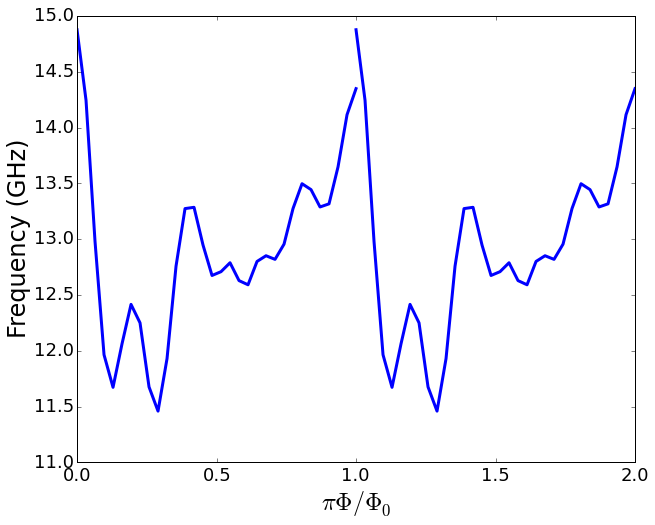

In [74]:
fig, axes = plt.subplots(figsize=(8, 8))

# original
#Z = np.real(U)
plt.plot(np.linspace(-0, 1, flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)
plt.plot(np.linspace(1, 2, flux_steps), (energies[:,1]-energies[:,0])/1e9, 'b', linewidth=3.0)
#plt.plot(np.linspace(-0, 2, flux_steps), (energies[:,2]-energies[:,1])/1e9, 'r', linewidth=3.0)
#plt.plot(np.linspace(-0, 2, flux_steps), (energies[:,3]-energies[:,2])/1e9, 'g', linewidth=3.0)
axes.set_xlabel(r'$\pi\Phi/\Phi_0$', fontsize=24)
axes.set_ylabel(r'Frequency (GHz)', fontsize=24)

axes.tick_params(axis='x', labelsize=18)
axes.tick_params(axis='y', labelsize=18)

#axes.set_ylim((9, 10))

#plt.plot(np.linspace(-6*np.pi, 6*np.pi, flux_steps), energies[:,1]-energies[:,0])
#plt.plot(np.linspace(-0.9*np.pi, -0.1*np.pi, flux_steps), (energies[:,2]-energies[:,0])/2)

#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), -(energies[:,1]-energies[:,0])+(energies[:,2]-energies[:,1]), 'r')
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,2]-energies[:,1])
#plt.plot(np.linspace(-2*np.pi, 2*np.pi, flux_steps), energies[:,3]-energies[:,2])

plt.gcf().set_size_inches(10,8)
plt.savefig("C:/neon/6 mirror qubit.pdf", bbox_inches="tight")